In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
#Our default forecast will be a holts-winter, I imagine results are very sensitive to this decision!
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
#Read in bitcoin data
bitcoin_data_df = pd.read_csv('C:/Users/Jon/Downloads/bitcoinity_data.csv')

In [3]:
#Anchor our analysis on coinbase and look at the data
coinbase_df = bitcoin_data_df[['coinbase']]

coinbase_df.describe()

,coinbase
count,167.000000
mean,488.517157
std,419.698223
min,68.495962
25%,242.750072
50%,394.717424
75%,585.952732
max,3814.396662


C:\Users\Jon\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


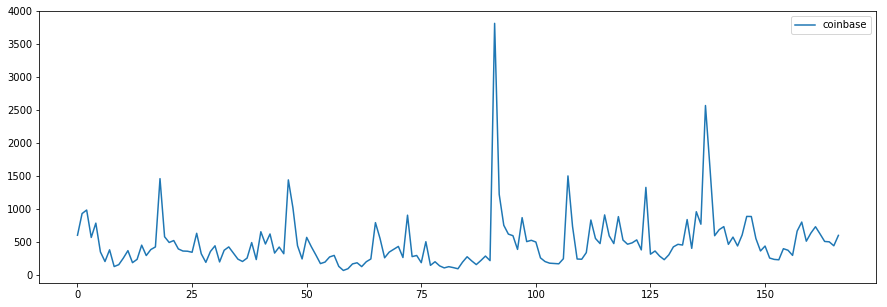

In [4]:
#Based on earlier data and plots, we set 250 as our reversion level, this should likely be refine to be time varying
#and based on historic drops, not pure crashes

plt, ax = plt.subplots(figsize = (15,5))

coinbase_df.plot(ax =ax)
plt.show()

C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jon\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


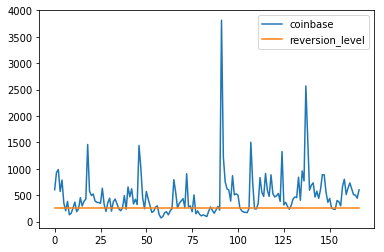

In [5]:
coinbase_df['reversion_level'] = 250

coinbase_df.plot()
plt.show()

In [6]:
#We now use an exponential smoother to guess what would have been a fair guess for returns (without a crash occuring)
#This is just a weighted moving average

holt_forecast = Holt( coinbase_df['coinbase'].values ).fit()

coinbase_df['holt_fit'] = holt_forecast.fittedvalues

C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
#We now add in probability of crashes using the formula:
# (1- Crash Prob) * Value|No Crash = Crash Prob * (reversion level)
#Crash Prob / (1- Crash Prob) = Value|No Crash / (reversion level)
#Solve for this using algebra similar to logistic regression

coinbase_df['crash_ratio'] = coinbase_df['holt_fit']/(coinbase_df['reversion_level'])
coinbase_df['crash_ratio'] = coinbase_df['crash_ratio'].apply(lambda s: max(0.01,s))

coinbase_df['crash_prob'] = coinbase_df['crash_ratio'].apply(lambda s: 1/(1+s**(-1)))

C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [8]:
coinbase_df.head()

,coinbase,reversion_level,holt_fit,crash_ratio,crash_prob
0,602.313507,250,642.455377,2.569822,0.719874
1,930.814871,250,633.041687,2.532167,0.716888
2,984.381819,250,702.872624,2.811490,0.737635
3,568.868531,250,768.889485,3.075558,0.754635
4,785.598427,250,721.982472,2.887930,0.742794


C:\Users\Jon\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


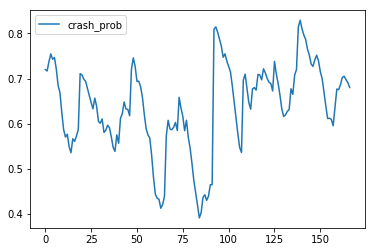

In [9]:
coinbase_df[['crash_prob']].plot()
plt.show()